In [1]:
# !cdo settunits,days -settaxis,2005-01-15,00:00,1month merged_taxis_AVEARCHM_2005_2020.nc merged_taxis_AVEARCHM_2005_2020_corr.nc

In [2]:
# !cdo settunits,days -settaxis,1993-01-15,00:00,1month alt_new.nc adt_new.nc

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import matplotlib as mpl


In [19]:
# !ls

In [26]:
ssh_model = xr.open_dataset('merged_taxis_AVEARCHM_2005_2020_corr.nc') #, decode_times=False)
ssh_model

<xarray.Dataset>
Dimensions:      (time: 190, longitude: 721, latitude: 481)
Coordinates:
  * time         (time) datetime64[ns] 2005-01-15 2005-02-15 ... 2020-10-15
  * longitude    (longitude) float32 20.0 20.12 20.25 ... 109.8 109.9 110.0
  * latitude     (latitude) float32 -30.0 -29.88 -29.75 ... 29.75 29.88 30.0
Data variables:
    model_depth  (latitude, longitude) float32 ...
    zos          (time, latitude, longitude) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.9rc1 (https://mpimet.m...
    Conventions:    CF-1.4
    history:        Mon Sep 18 19:03:43 2023: cdo settunits,days -settaxis,20...
    source:         NERSC-HYCOM model fields
    institution:    NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    title:          Arctic Ocean Physics Reanalysis
    references:     http://topaz.nersc.no
    field_type:     Files based on file type archm
    field_date:     2005-01-01T12:00:00Z
    bulletin_date:  2005-01-01T12:00:00Z
    CDO:            Climate Data Operators version 1.9.9rc1 (https://mpimet.m...

# SSHA calc

In [4]:
ssh = ssh_model['zos']
print(ssh.shape)

# Calculate the mean along the specified dimensions (assuming you want to calculate it for the entire dataset)
ssh_ave = ssh.mean(dim=('time', 'latitude', 'longitude'))
# Subtract the mean to get ssha
ssha = ssh - ssh_ave

########
# Save the new dataset with the custom variable name to a NetCDF file
########
# ssha_df = xr.Dataset({'ssha': ssha})
# ssha_df.to_netcdf('ssha_AVEARCHM_2005_2020_corr.nc')

#######

(190, 481, 721)


# Hovmoller - SSHA Model- MONTHLY

2 (46, 129) (46, 129) (46, 129)
time shape (46,)
[10]
[22]
[34]
[46]
delta_x_a: 1000000 km delta_t_a: 21600.0 months
delta_x_b: 1000000 km delta_t_b: 21600.0 months
delta_x_d: 1000000 km delta_t_d: 21600.0 months
Estimated Rossby Wave Speed of 2017: 46.2962962962963
Estimated Rossby Wave Speed of 2018: 46.2962962962963
Estimated Rossby Wave Speed of 2020: 46.2962962962963
[65, 75] ['2017-07-15', '2017-10-15']
Slope of Rossby Wave Propagation Line: -0.10869565217391304


/tmp/ipykernel_6168/3984257425.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1_a, x2_a], [t1_a, t2_a], 'k--', lw=5, color='black', label='Propagation Direction')


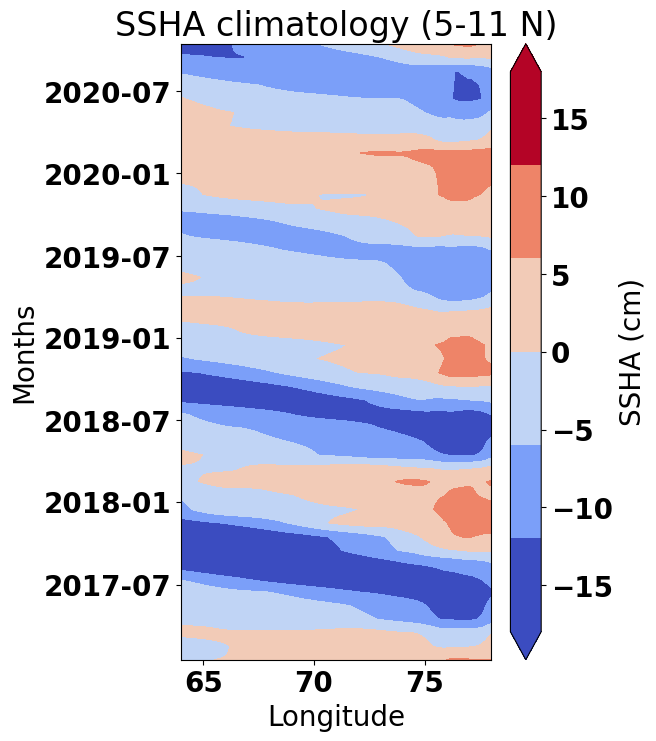

In [146]:

ssha_model_MONTH = xr.open_dataset('ssha_AVEARCHM_2005_2020_corr.nc') #, decode_times=False)
ssha_model_MONTH
# print(ssha_model_MONTH.dims)

# Define the time range from 2017-01-01 to 2020-12-31
start_date = "2017-01-01"
end_date = "2020-12-31"

# Slice the dataset to include the specified time range
ssha_model_time_slice = ssha_model_MONTH.sel(latitude=slice(8, 11), longitude=slice(64, 80), time=slice(start_date, end_date))

# Calculate the mean along the latitude dimension
hovmoller_ssha_model_monthly = ssha_model_time_slice.mean(dim='latitude')

# Create a mesh grid for longitude and time
longitude_mesh, time_mesh = np.meshgrid(hovmoller_ssha_model_monthly['longitude'], hovmoller_ssha_model_monthly['time'])

ssha_model_mon = hovmoller_ssha_model_monthly['ssha']*100 # in centimeters

# Check dimensions again
print('2', longitude_mesh.shape, time_mesh.shape, hovmoller_ssha_model_monthly['ssha'].shape)


fig = plt.figure(figsize=(5, 8))

# Plot the Hovmöller diagram
plt.contourf(longitude_mesh, time_mesh, ssha_model_mon, cmap='coolwarm', \
             extend='both', vmin=-15, vmax=15)
# plt.colorbar(label='ADT (cm)')
plt.title('SSHA climatology (5-11 N)')
plt.xlabel('Longitude')
plt.ylabel('Months')

plt.colorbar(orientation='vertical', label='SSHA (cm)', \
                    extend='both', ticks=[-15, -10, -5, 0, 5, 10, 15])

plt.ylim(['2017-01-15'], ['2020-10-15'])
plt.xlim([64, 78])

# ########################## START: DIAGONAL LINE FOR PROPAGATION ######################################################

# Calculate the slope of the Rossby wavefront
# Here, you'll need to manually select two points on the wavefront and calculate the slope
# For example, you can choose two points (x1, t1) and (x2, t2) on the wavefront

print('time shape', hovmoller_ssha_model_monthly['time'].shape)
# print(hovmoller_ssha_model_monthly['time'].values)
print(np.where(hovmoller_ssha_model_monthly['time'].values == np.datetime64('2017-10-15'))[0]+1)
print(np.where(hovmoller_ssha_model_monthly['time'].values == np.datetime64('2018-10-15'))[0]+1)
print(np.where(hovmoller_ssha_model_monthly['time'].values == np.datetime64('2019-10-15'))[0]+1)
print(np.where(hovmoller_ssha_model_monthly['time'].values == np.datetime64('2020-10-15'))[0]+1)


x1_a, x2_a = 65, 75 ; t1_a, t2_a = 10, 7  # Adjust these coordinates to your specific wavefront
x1_b, x2_b = 65, 75 ; t1_b, t2_b = 22, 19
x1_c, x2_c = 65, 75 ; t1_c, t2_c = 34, 30
x1_d, x2_d = 65, 75 ; t1_d, t2_d = 46, 43

# # Calculate the change in longitude and time
# # delta_x = abs(x2 - x1)*100
# # delta_t = abs(t2 - t1)*12

delta_x_a = abs(x2_a - x1_a) * 100 * 1000  # Convert degrees to centimeters
delta_t_a = abs(t2_a - t1_a) * 30 * 24 * 60 * 60 / 360  # Convert from months to seconds

delta_x_b = abs(x2_b - x1_b) * 100 * 1000  # Convert degrees to centimeters
delta_t_b = abs(t2_b - t1_b) * 30 * 24 * 60 * 60 / 360  # Convert from months to seconds

delta_x_d = abs(x2_d - x1_d) * 100 * 1000  # Convert degrees to centimeters
delta_t_d = abs(t2_d - t1_d) * 30 * 24 * 60 * 60 / 360  # Convert from months to seconds

print('delta_x_a:', delta_x_a,'km', 'delta_t_a:', delta_t_a,'months')
print('delta_x_b:', delta_x_b,'km', 'delta_t_b:', delta_t_b,'months')
print('delta_x_d:', delta_x_d,'km', 'delta_t_d:', delta_t_d,'months')

# Estimate the Rossby wave speed
rossby_wave_speed_a = delta_x_a / delta_t_a
rossby_wave_speed_b = delta_x_b / delta_t_b
rossby_wave_speed_d = delta_x_d / delta_t_d

print('Estimated Rossby Wave Speed of 2017:', rossby_wave_speed_a)
print('Estimated Rossby Wave Speed of 2018:', rossby_wave_speed_b)
print('Estimated Rossby Wave Speed of 2020:', rossby_wave_speed_d)

longitude_values = hovmoller_ssha_model_monthly['longitude'].values
time_values      = hovmoller_ssha_model_monthly['time'].values

# Mark the selected points (x1, t1) and (x2, t2) on the plot
t1_a_date, t2_a_date = '2017-10-15', '2017-07-15'  # Dates

# Get the indices of the corresponding dates in the time values
index_t1_a = np.where(time_values == np.datetime64(t1_a_date))[0][0]
index_t2_a = np.where(time_values == np.datetime64(t2_a_date))[0][0]
print([x1_a, x2_a], [t2_a_date, t1_a_date])
# plt.plot([x1_a, x2_a], ['2017-10-15', '2017-07-15'], 'k--', lw=5,  color='black', label='Propagation Direction')
plt.plot([x1_a, x2_a], [t1_a, t2_a], 'k--', lw=5, color='black', label='Propagation Direction')


# Calculate the change in longitude and time
delta_x_aa = x2_a - x1_a
delta_t_aa = (pd.to_datetime(t2_a_date) - pd.to_datetime(t1_a_date)).days  # Convert time to days

# Calculate the slope
slope_a = delta_x_aa / delta_t_aa

print('Slope of Rossby Wave Propagation Line:', slope_a)

# ########################## END: DIAGONAL LINE FOR PROPAGATION ######################################################

# # Adjust subplot spacing and display the plot
# plt.tight_layout()
# # plt.savefig('MODEL_SSHA_hovmoller_5_11_monthly.png', dpi=300, bbox_inches='tight')


# SSHA climatology


In [5]:
ssha_model = xr.open_dataset('ssha_AVEARCHM_2005_2020_corr.nc').sel(longitude=slice(45,100), latitude=slice(-5,30)) #, decode_times=False)
ssha_nc = ssha_model['ssha']
times2 = ssha_model['time']
lon = ssha_model['longitude']
lat = ssha_model['latitude']

# Compute the monthly climatology
ssha_monthly_climatology = ssha_nc.groupby('time.month').mean(dim='time')

# Select the climatology for January (assuming January corresponds to month 1)
jan_climatology = ssha_monthly_climatology.sel(month=1)*100
feb_climatology = ssha_monthly_climatology.sel(month=2)*100
mar_climatology = ssha_monthly_climatology.sel(month=3)*100
apr_climatology = ssha_monthly_climatology.sel(month=4)*100
may_climatology = ssha_monthly_climatology.sel(month=5)*100
jun_climatology = ssha_monthly_climatology.sel(month=6)*100
jul_climatology = ssha_monthly_climatology.sel(month=7)*100
aug_climatology = ssha_monthly_climatology.sel(month=8)*100
sep_climatology = ssha_monthly_climatology.sel(month=9)*100
oct_climatology = ssha_monthly_climatology.sel(month=10)*100
nov_climatology = ssha_monthly_climatology.sel(month=11)*100
dec_climatology = ssha_monthly_climatology.sel(month=12)*100


print(ssha_nc.shape)
print(lon.shape, lat.shape)
print(sep_climatology.shape)

########
# Save the new dataset with the custom variable name to a NetCDF file
########
# ssha_model_clim_df = xr.Dataset({'ssha_monthly_climatology': ssha_monthly_climatology})
# ssha_model_clim_df.to_netcdf('ssha_monthly_clim.nc')


(190, 281, 441)
(441,) (281,)
(281, 441)


# SSHA -Plotting

/home/akashs/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/akashs/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/tmp/ipykernel_6168/4059359232.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


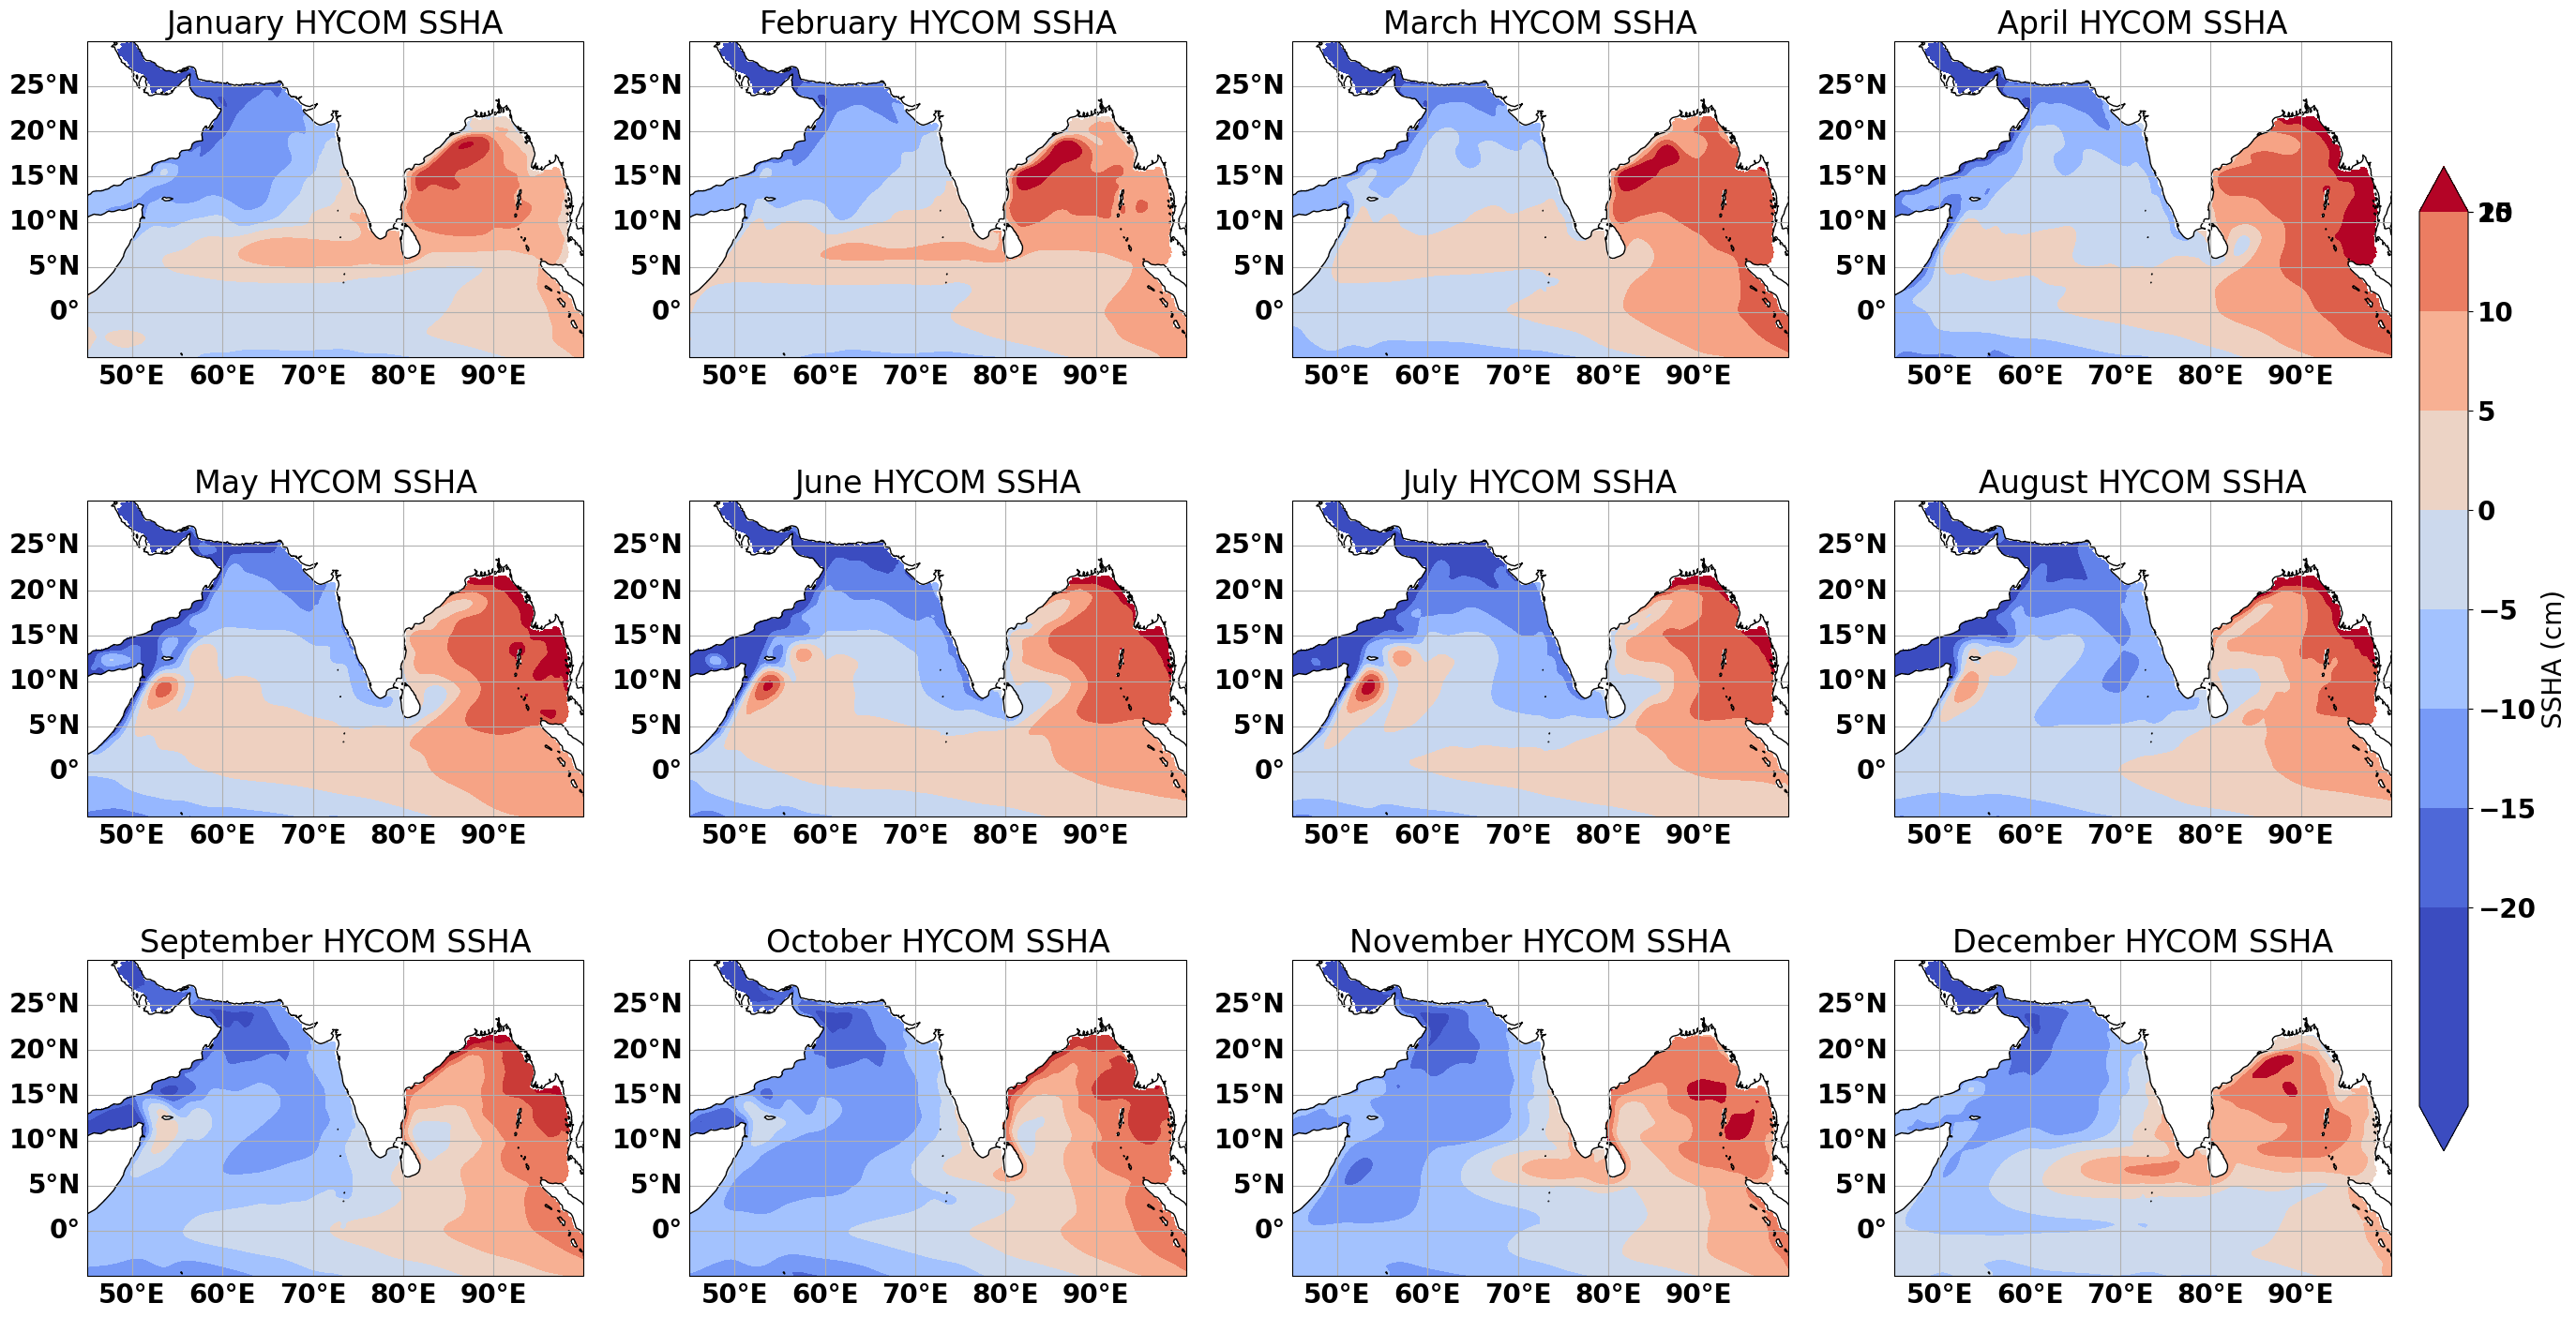

In [6]:
# Create separate subplots for each climatology
# fig = plt.figure(figsize=(12, 8))
mpl.rcParams['font.size'] = 20  # Change 12 to your desired font size
mpl.rcParams['font.weight'] = 'bold'


# # Plot September Climatology
# ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
# contour1 = ax1.contourf(lon, lat, sep_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=10,
#                        extend='both', vmin=-30, vmax=30)
# ax1.coastlines()
# # ax1.gridlines(draw_labels=True)
# ax1.set_title('September HYCOM SSHA')
# # Create gridlines with tick labels
# gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl1.xlabels_top = False
# gl1.ylabels_right = False
# gl1.xlines = False
# gl1.ylines = False

# # Plot October Climatology
# ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
# contour2 = ax2.contourf(lon, lat, oct_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=10,
#                        extend='both', vmin=-30, vmax=30)
# ax2.coastlines()
# # ax2.gridlines(draw_labels=True)
# ax2.set_title('October HYCOM SSHA')
# # Create gridlines with tick labels
# gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl2.xlabels_top = False
# gl2.ylabels_right = False
# gl2.ylabels_left = False
# gl2.xlines = False
# gl2.ylines = False

# # Plot November Climatology
# ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
# contour3 = ax3.contourf(lon, lat, nov_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=10,
#                        extend='both', vmin=-30, vmax=30)
# ax3.coastlines()
# # ax3.gridlines(draw_labels=True)
# ax3.set_title('November HYCOM SSHA')
# gl3 = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl3.xlabels_top = False
# gl3.ylabels_right = False
# gl3.xlines = False
# gl3.ylines = False

# # Plot December Climatology
# ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
# contour4 = ax4.contourf(lon, lat, dec_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=10,
#                        extend='both', vmin=-30, vmax=30)
# ax4.coastlines()
# # ax4.gridlines(draw_labels=True)
# ax4.set_title('December HYCOM SSHA')
# gl4 = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl4.xlabels_top = False
# gl4.ylabels_right = False
# gl4.ylabels_left = False
# gl4.xlines = False
# gl4.ylines = False

# Create a 3x4 grid of subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(26, 15), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)

# Define climatologies and month names
climatologies = [jan_climatology, feb_climatology, mar_climatology, apr_climatology, 
                 may_climatology, jun_climatology, jul_climatology, aug_climatology, 
                 sep_climatology, oct_climatology, nov_climatology, dec_climatology]
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']

for i, ax in enumerate(axes.flat):
    contour = ax.contourf(lon, lat, climatologies[i], transform=ccrs.PlateCarree(), cmap='coolwarm', levels=10,
                          extend='both', vmin=-20, vmax=20)
    ax.coastlines()
    ax.set_title(f'{month_names[i]} HYCOM SSHA')
    
    # Create gridlines with tick labels
#     gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    # Create gridlines with tick labels
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False



# Add a colorbar for the entire figure
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Define the position of the colorbar
cbar = fig.colorbar(contour, cax=cbar_ax, orientation='vertical', label='SSHA (cm)',\
                    extend='both', ticks=[ -20, -15, -10, -5, 0, 5, 10, 15, 20])

fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Adjust subplot spacing and display the plot
plt.tight_layout()
# plt.savefig('HYCOM_SSHA.png', dpi=300, bbox_inches='tight')



# Hovmoller - SSHA Model- Climatology

Frozen({'longitude': 441, 'latitude': 241, 'month': 12})
1 (12, 129) (12, 129) (12, 129)
2 (12, 129) (12, 129) (12, 129)
delta_x: 1000000 km delta_t: 7776000 months
Estimated Rossby Wave Speed: 0.1286008230452675


/tmp/ipykernel_6168/1012184356.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x1, x2], [t1, t2],  'k--', lw=2,  color='white', label='Propagation Direction')


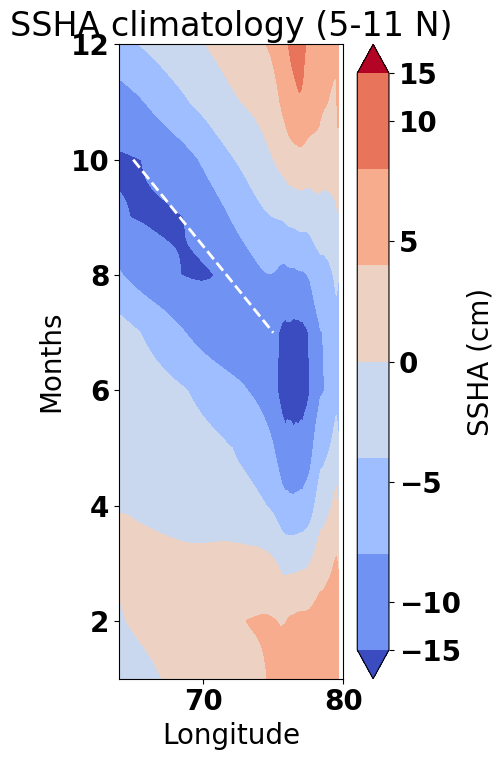

In [58]:

ssha_model_clim_ = xr.open_dataset('ssha_monthly_clim.nc') #, decode_times=False)
print(ssha_model_clim_.dims)
ssha_model_clim = ssha_model_clim_['ssha_monthly_climatology']

# Replace 'ssha_nc' with your actual data
hovmoller_ssha_model_ = ssha_model_clim.sel(latitude=slice(8, 11), longitude=slice(64, 80))
hovmoller_ssha_model = hovmoller_ssha_model_.mean(dim='latitude')

# Create a mesh grid for longitude and time
longitude_mesh, time_mesh = np.meshgrid(hovmoller_ssha_model['longitude'], hovmoller_ssha_model['month'])

# Check dimensions
print('1', longitude_mesh.shape, time_mesh.shape, hovmoller_ssha_model.shape)

# Ensure that dimensions match by removing the last row and column if necessary
if longitude_mesh.shape != hovmoller_ssha_model.shape:
    longitude_mesh = longitude_mesh[:-1, :-1]
    time_mesh = time_mesh[:-1, :-1]
    
# Check dimensions again
print('2', longitude_mesh.shape, time_mesh.shape, hovmoller_ssha_model.shape)


fig = plt.figure(figsize=(5, 8))

# Plot the Hovmöller diagram
plt.contourf(longitude_mesh, time_mesh, hovmoller_ssha_model*100, cmap='coolwarm', \
             extend='both', vmin=-15, vmax=15)
# plt.colorbar(label='ADT (cm)')
plt.title('SSHA climatology (5-11 N)')
plt.xlabel('Longitude')
plt.ylabel('Months')

plt.colorbar(orientation='vertical', label='SSHA (cm)', \
                    extend='both', ticks=[-15, -10, -5, 0, 5, 10, 15])

########################## START: DIAGONAL LINE FOR PROPAGATION ######################################################

# Calculate the slope of the Rossby wavefront
# Here, you'll need to manually select two points on the wavefront and calculate the slope
# For example, you can choose two points (x1, t1) and (x2, t2) on the wavefront

x1, t1 = 65, 10  # Adjust these coordinates to your specific wavefront
x2, t2 = 75, 7

# Calculate the change in longitude and time
# delta_x = abs(x2 - x1)*100
# delta_t = abs(t2 - t1)*12

delta_x = abs(x2 - x1) * 100 * 1000  # Convert degrees to centimeters
delta_t = abs(t2 - t1) * 30 * 24 * 60 * 60 #/ 360  # Convert from months to seconds

print('delta_x:', delta_x,'km', 'delta_t:', delta_t,'months')

# Estimate the Rossby wave speed
rossby_wave_speed = delta_x / delta_t

print('Estimated Rossby Wave Speed:', rossby_wave_speed)

# Mark the selected points (x1, t1) and (x2, t2) on the plot
plt.plot([x1, x2], [t1, t2],  'k--', lw=2,  color='white', label='Propagation Direction')

########################## END: DIAGONAL LINE FOR PROPAGATION ######################################################

# Adjust subplot spacing and display the plot
plt.tight_layout()
# plt.savefig('MODEL_SSHA_hovmoller_5_11.png', dpi=300, bbox_inches='tight')


# ADT anomaly calc

In [14]:
adt_satellite = xr.open_dataset('adt_new.nc')['ADT'].sel(TIME=slice('2005-01-01', '2020-12-31')) #, decode_times=False)
times = adt_satellite['TIME']
long = adt_satellite['LON']
lati = adt_satellite['LAT']
print(adt_satellite.shape)

# Calculate the mean along the specified dimensions (assuming you want to calculate it for the entire dataset)
adt_satellite_ave = adt_satellite.mean(dim=('TIME', 'LAT', 'LON'))
# Subtract the mean to get ssha
adt_satellite_anom = adt_satellite - adt_satellite_ave

########
# Save the new dataset with the custom variable name to a NetCDF file
########
# adt_satellite_anom_df = xr.Dataset({'adt_satellite_anom': adt_satellite_anom})
# adt_satellite_anom_df.to_netcdf('adt_satellite_anom_AVEARCHM_2005_2020_corr.nc')


(168, 180, 361)


# ADT anomaly climatology

In [15]:
adt_satellite_anom_nc = xr.open_dataset('adt_satellite_anom_AVEARCHM_2005_2020_corr.nc').sel(LON=slice(45,100), LAT=slice(0,30)) #, decode_times=False)
adt_satellite_anom = adt_satellite_anom_nc['adt_satellite_anom']
times_adt = adt_satellite_anom_nc['TIME']
lon_adt = adt_satellite_anom_nc['LON']
lat_adt = adt_satellite_anom_nc['LAT']

# Compute the monthly climatology
adt_monthly_climatology = adt_satellite_anom.groupby('TIME.month').mean(dim='TIME')


# Select the climatology for January (assuming January corresponds to month 1)
adt_jan_climatology = adt_monthly_climatology.sel(month=1)*100
adt_feb_climatology = adt_monthly_climatology.sel(month=2)*100
adt_mar_climatology = adt_monthly_climatology.sel(month=3)*100
adt_apr_climatology = adt_monthly_climatology.sel(month=4)*100
adt_may_climatology = adt_monthly_climatology.sel(month=5)*100
adt_jun_climatology = adt_monthly_climatology.sel(month=6)*100
adt_jul_climatology = adt_monthly_climatology.sel(month=7)*100
adt_aug_climatology = adt_monthly_climatology.sel(month=8)*100
adt_sep_climatology = adt_monthly_climatology.sel(month=9)*100
adt_oct_climatology = adt_monthly_climatology.sel(month=10)*100
adt_nov_climatology = adt_monthly_climatology.sel(month=11)*100
adt_dec_climatology = adt_monthly_climatology.sel(month=12)*100

print(adt_satellite_anom.shape)
print(lon_adt.shape, lat_adt.shape)
print(adt_sep_climatology.shape)


########
# Save the new dataset with the custom variable name to a NetCDF file
########
# adt_satellite_anom_clim_df = xr.Dataset({'adt_monthly_climatology': adt_monthly_climatology})
# adt_satellite_anom_clim_df.to_netcdf('adt_satellite_anom_clim.nc')



(168, 120, 221)
(221,) (120,)
(120, 221)


# ADT anomaly - Plotting

/tmp/ipykernel_6168/3536505332.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


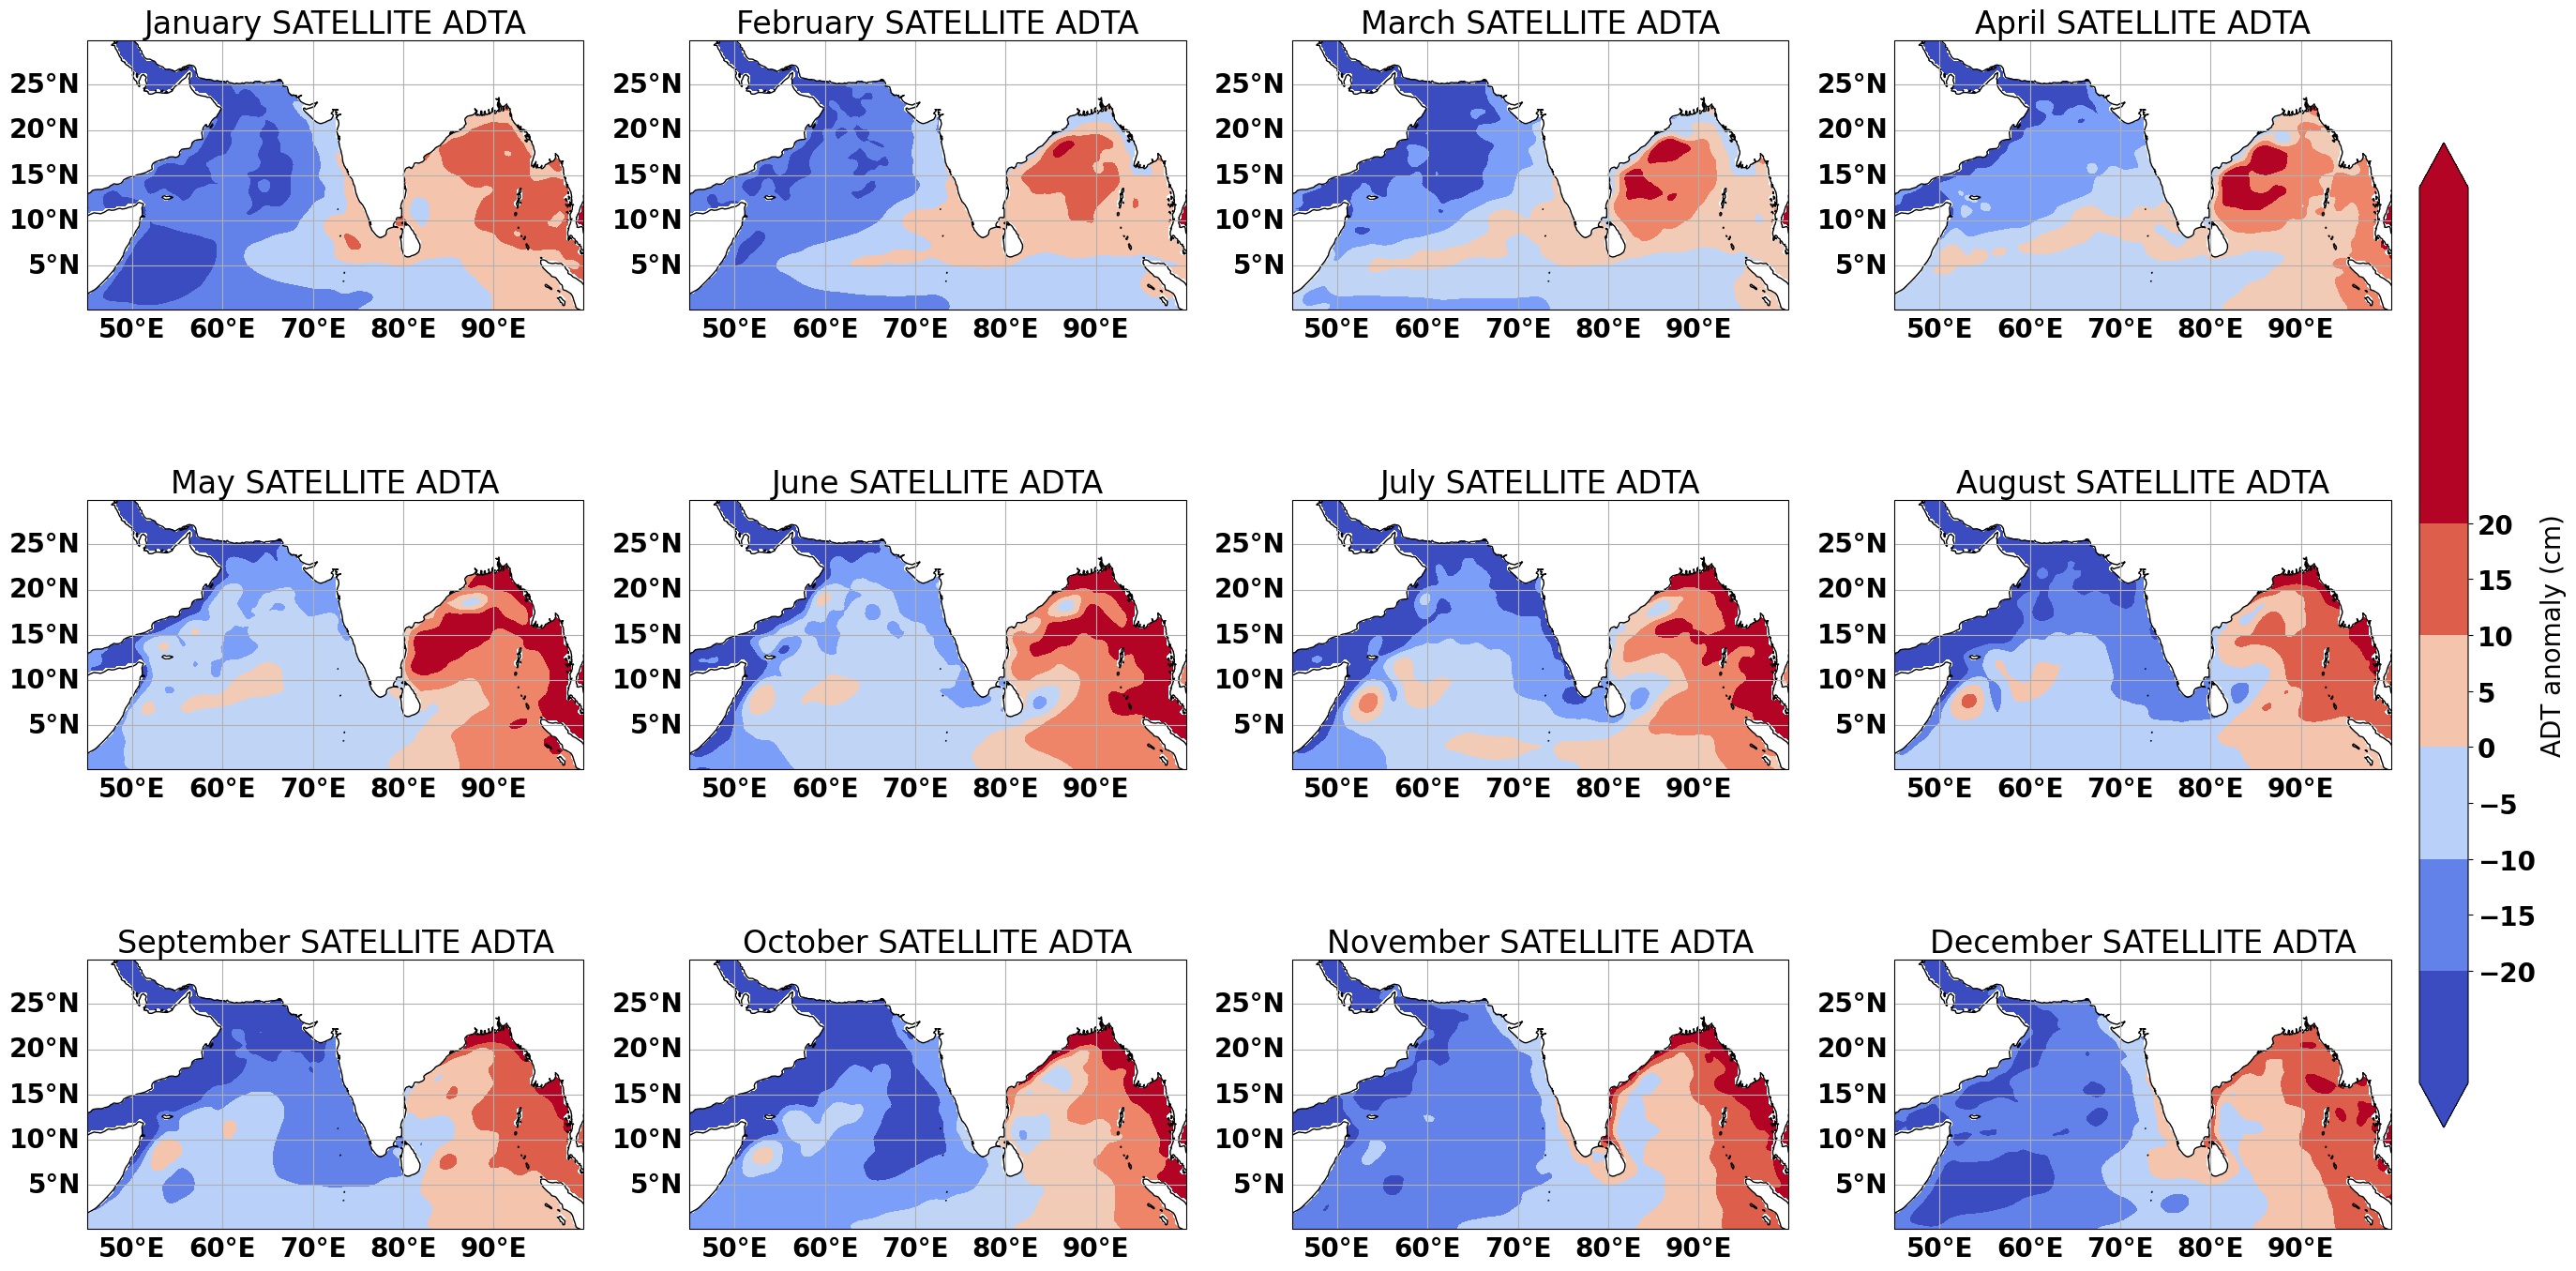

In [17]:
# # Create separate subplots for each climatology
# fig = plt.figure(figsize=(12, 8))
mpl.rcParams['font.size'] = 20  # Change 12 to your desired font size
mpl.rcParams['font.weight'] = 'bold'


# # Plot September Climatology
# ax1 = fig.add_subplot(221, projection=ccrs.PlateCarree())
# contour1 = ax1.contourf(lon_adt, lat_adt, adt_sep_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=15,
#                        extend='both', vmin=-30, vmax=30)
# ax1.coastlines()
# # ax1.gridlines(draw_labels=True)
# ax1.set_title('September SATELLITE ADTA')
# # Create gridlines with tick labels
# gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl1.xlabels_top = False
# gl1.ylabels_right = False
# gl1.xlines = False
# gl1.ylines = False

# # Plot October Climatology
# ax2 = fig.add_subplot(222, projection=ccrs.PlateCarree())
# contour2 = ax2.contourf(lon_adt, lat_adt, adt_oct_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=15,
#                        extend='both', vmin=-30, vmax=30)
# ax2.coastlines()
# # ax2.gridlines(draw_labels=True)
# ax2.set_title('October SATELLITE ADTA')
# # Create gridlines with tick labels
# gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl2.xlabels_top = False
# gl2.ylabels_right = False
# gl2.ylabels_left = False
# gl2.xlines = False
# gl2.ylines = False

# # Plot November Climatology
# ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
# contour3 = ax3.contourf(lon_adt, lat_adt, adt_nov_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=15,
#                        extend='both', vmin=-30, vmax=30)
# ax3.coastlines()
# # ax3.gridlines(draw_labels=True)
# ax3.set_title('November SATELLITE ADTA')
# gl3 = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl3.xlabels_top = False
# gl3.ylabels_right = False
# gl3.xlines = False
# gl3.ylines = False

# # Plot December Climatology
# ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
# contour4 = ax4.contourf(lon_adt, lat_adt, adt_dec_climatology, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=15,
#                        extend='both', vmin=-30, vmax=30)
# ax4.coastlines()
# # ax4.gridlines(draw_labels=True)
# ax4.set_title('December SATELLITE ADTA')
# gl4 = ax4.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
# gl4.xlabels_top = False
# gl4.ylabels_right = False
# gl4.ylabels_left = False
# gl4.xlines = False
# gl4.ylines = False

# Create a 3x4 grid of subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(26, 15), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)

# Define climatologies and month names
adt_climatologies = [adt_jan_climatology, adt_feb_climatology, adt_mar_climatology, adt_apr_climatology, 
                 adt_may_climatology, adt_jun_climatology, adt_jul_climatology, adt_aug_climatology, 
                 adt_sep_climatology, adt_oct_climatology, adt_nov_climatology, adt_dec_climatology]
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']

for i, ax in enumerate(axes.flat):
    contour2 = ax.contourf(lon_adt, lat_adt, adt_climatologies[i], transform=ccrs.PlateCarree(), cmap='coolwarm', levels=10,
                          extend='both', vmin=-20, vmax=20)
    ax.coastlines()
    ax.set_title(f'{month_names[i]} SATELLITE ADTA')
    
    # Create gridlines with tick labels
#     gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    # Create gridlines with tick labels
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    

# Add a colorbar for the entire figure
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # Define the position of the colorbar
cbar = fig.colorbar(contour2, cax=cbar_ax, orientation='vertical', label='ADT anomaly (cm)', \
                    extend='both', ticks=[-20, -15, -10, -5, 0, 5, 10, 15, 20]) #ticks=[-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]

fig.subplots_adjust(hspace=0.7, wspace=0.2)

# Adjust subplot spacing and display the plot
plt.tight_layout()
# plt.savefig('SATELLITE_ADTA.png', dpi=300, bbox_inches='tight')



# Hovmoller (5-11 N)- ADTA Satellite -Climatology

Frozen({'LON': 221, 'LAT': 120, 'month': 12})
1 (12, 65) (12, 65) (12, 65)
2 (12, 65) (12, 65) (12, 65)


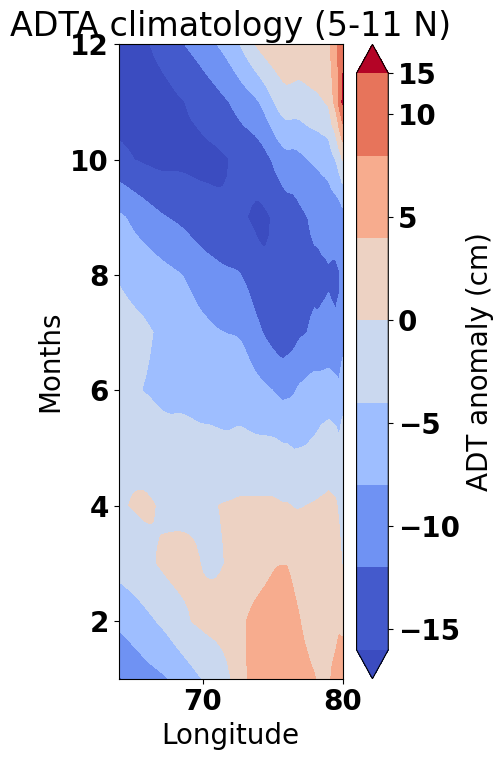

In [18]:

adt_satellite_anom_clim_ = xr.open_dataset('adt_satellite_anom_clim.nc') #, decode_times=False)
print(adt_satellite_anom_clim_.dims)
adt_satellite_anom_clim = adt_satellite_anom_clim_['adt_monthly_climatology']

# Replace 'ssha_nc' with your actual data
hovmoller_adt_satellite_ = adt_satellite_anom_clim.sel(LAT=slice(5, 11), LON=slice(64, 80))
# hovmoller_adt_satellite = adt_satellite_anom.sel(LAT=slice(5, 11), LON=slice(64, 80))
hovmoller_adt_satellite = hovmoller_adt_satellite_.mean(dim='LAT')

# Create a mesh grid for longitude and time
longitude_mesh2, time_mesh2 = np.meshgrid(hovmoller_adt_satellite['LON'], hovmoller_adt_satellite['month'])

# Check dimensions
print('1', longitude_mesh2.shape, time_mesh2.shape, hovmoller_adt_satellite.shape)

# Ensure that dimensions match by removing the last row and column if necessary
if longitude_mesh2.shape != hovmoller_adt_satellite.shape:
    longitude_mesh2 = longitude_mesh2[:-1, :-1]
    time_mesh2 = time_mesh2[:-1, :-1]
    
# Check dimensions again
print('2', longitude_mesh2.shape, time_mesh2.shape, hovmoller_adt_satellite.shape)


fig = plt.figure(figsize=(5, 8))

# Plot the Hovmöller diagram
plt.contourf(longitude_mesh2, time_mesh2, hovmoller_adt_satellite*100, cmap='coolwarm', \
             extend='both', vmin=-15, vmax=15)
# plt.colorbar(label='ADT (cm)')
plt.title('ADTA climatology (5-11 N)')
plt.xlabel('Longitude')
plt.ylabel('Months')

plt.colorbar(orientation='vertical', label='ADT anomaly (cm)', \
                    extend='both', ticks=[-15, -10, -5, 0, 5, 10, 15])

# Adjust subplot spacing and display the plot
plt.tight_layout()
# plt.savefig('SATELLITE_ADT_hovmoller_5_11.png', dpi=300, bbox_inches='tight')


1 (12, 65) (12, 65) (12, 65)
delta_x: 1000000 km delta_t: 28800.0 months
Estimated Rossby Wave Speed: 34.72222222222222


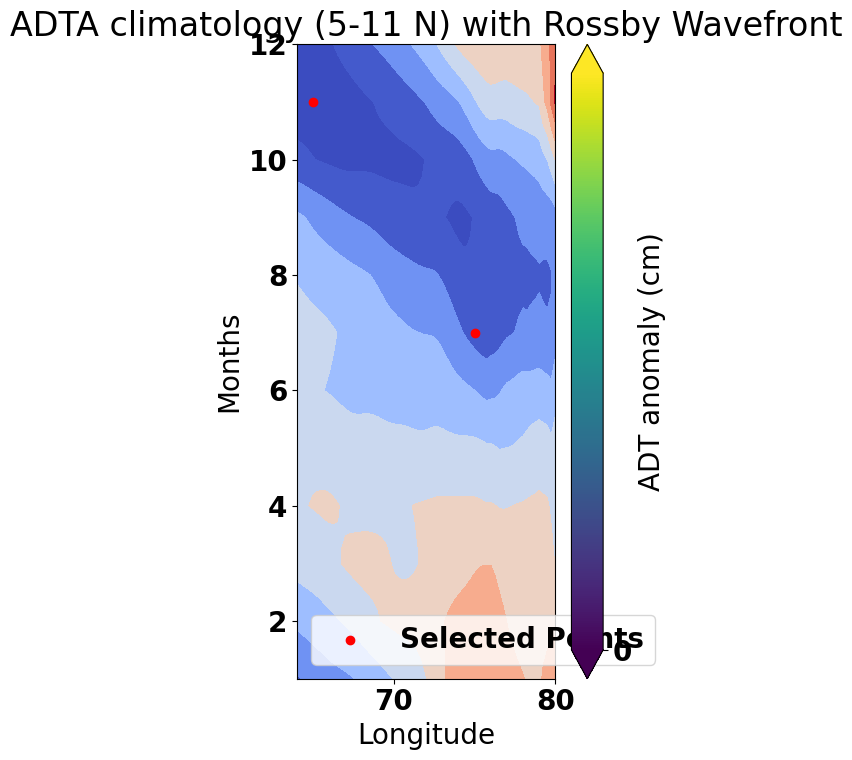

In [39]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Load your dataset
adt_satellite_anom_clim_ = xr.open_dataset('adt_satellite_anom_clim.nc')
adt_satellite_anom_clim = adt_satellite_anom_clim_['adt_monthly_climatology']

# Select the region of interest
hovmoller_adt_satellite_ = adt_satellite_anom_clim.sel(LAT=slice(5, 11), LON=slice(64, 80))
hovmoller_adt_satellite = hovmoller_adt_satellite_.mean(dim='LAT')

# Create a mesh grid for longitude and time
longitude_mesh2, time_mesh2 = np.meshgrid(hovmoller_adt_satellite['LON'], hovmoller_adt_satellite['month'])

# Check dimensions
print('1', longitude_mesh2.shape, time_mesh2.shape, hovmoller_adt_satellite.shape)

# Ensure that dimensions match by removing the last row and column if necessary
if longitude_mesh2.shape != hovmoller_adt_satellite.shape:
    longitude_mesh2 = longitude_mesh2[:-1, :-1]
    time_mesh2 = time_mesh2[:-1, :-1]

# Calculate the slope of the Rossby wavefront
# Here, you'll need to manually select two points on the wavefront and calculate the slope
# For example, you can choose two points (x1, t1) and (x2, t2) on the wavefront

x1, t1 = 65, 11  # Adjust these coordinates to your specific wavefront
x2, t2 = 75, 7

# Calculate the change in longitude and time
# delta_x = abs(x2 - x1)*100
# delta_t = abs(t2 - t1)*12

delta_x = abs(x2 - x1) * 100 * 1000  # Convert degrees to centimeters
delta_t = abs(t2 - t1) * 30 * 24 * 60 * 60 /360  # Convert from months to seconds

print('delta_x:', delta_x,'km', 'delta_t:', delta_t,'months')

# Estimate the Rossby wave speed
rossby_wave_speed = delta_x / delta_t

print('Estimated Rossby Wave Speed:', rossby_wave_speed)

# Plot the Hovmöller diagram with the estimated wavefront
fig = plt.figure(figsize=(5, 8))
plt.contourf(longitude_mesh2, time_mesh2, hovmoller_adt_satellite*100, cmap='coolwarm', \
             extend='both', vmin=-15, vmax=15)
plt.title('ADTA climatology (5-11 N) with Rossby Wavefront')
plt.xlabel('Longitude')
plt.ylabel('Months')

# Mark the selected points (x1, t1) and (x2, t2) on the plot
plt.scatter([x1, x2], [t1, t2], color='red', marker='o', label='Selected Points')
plt.legend()

plt.colorbar(orientation='vertical', label='ADT anomaly (cm)', \
                    extend='both', ticks=[-15, -10, -5, 0, 5, 10, 15])

# Adjust subplot spacing and display the plot
plt.tight_layout()
# plt.savefig('SATELLITE_ADT_hovmoller_5_11.png', dpi=300, bbox_inches='tight')

plt.show()


# END OF CODE